In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import glob

In [3]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [4]:
train_dir ="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dir="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"


In [5]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
70295 Train images
17572 Test images


In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
img_width,img_height =224,224
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [10]:
from keras.applications.mobilenet import MobileNet
from keras.models import Model
import keras
from keras import optimizers
model_finetuned = Sequential()

model_finetuned.add(MobileNet(weights='imagenet'))
model_finetuned.add(BatchNormalization())
model_finetuned.add(Dense(128, activation="relu"))
model_finetuned.add(Dense(38, activation="softmax"))
for layer in model_finetuned.layers[0].layers:
  if layer.__class__.__name__=="BatchNormalization":
    layer.trainable=True
  else:
    layer.trainable=False
model_finetuned.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

In [11]:
model_finetuned.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1000)              4253864   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dense (Dense)                (None, 128)               128128    
_________________________________________________________________
dense_1 (Dense)              (None, 38)                4902      
Total params: 4,390,894
Trainable params: 156,918
Non-trainable params: 4,233,976
_________________________________________________________________


In [12]:
from keras.callbacks import ReduceLROnPlateau
validation_generator = train_datagen.flow_from_directory(
                       test_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)

history_1 = model_finetuned.fit(train_generator,                                    
                                  steps_per_epoch=None, 
                                  epochs=8,validation_data=validation_generator,validation_steps=None
                                  ,verbose=1,callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],use_multiprocessing=False,
               shuffle=True)

Found 17572 images belonging to 38 classes.
Epoch 1/8
2197/2197 [==============================] - 1598s 725ms/step - loss: 1.3968 - accuracy: 0.6286 - val_loss: 0.4745 - val_accuracy: 0.8605
Epoch 2/8
2197/2197 [==============================] - 1057s 481ms/step - loss: 0.3282 - accuracy: 0.8953 - val_loss: 0.2785 - val_accuracy: 0.9154
Epoch 3/8
2197/2197 [==============================] - 1060s 483ms/step - loss: 0.2057 - accuracy: 0.9332 - val_loss: 0.1764 - val_accuracy: 0.9454
Epoch 4/8
2197/2197 [==============================] - 1065s 485ms/step - loss: 0.1471 - accuracy: 0.9508 - val_loss: 0.1334 - val_accuracy: 0.9586
Epoch 5/8
2197/2197 [==============================] - 1061s 483ms/step - loss: 0.1105 - accuracy: 0.9617 - val_loss: 0.0992 - val_accuracy: 0.9683
Epoch 6/8
2197/2197 [==============================] - 1056s 481ms/step - loss: 0.0855 - accuracy: 0.9708 - val_loss: 0.0857 - val_accuracy: 0.9718
Epoch 7/8
2197/2197 [==============================] - 1046s 476ms/s

In [13]:
from keras.models import load_model
model_finetuned.save('plantdiseasemobilenet8epoch.h5')

[[1.3139395e-10 1.7316720e-15 3.4367270e-12 8.8985541e-14 1.5127888e-13
  2.6636801e-13 8.5031533e-17 1.7295258e-12 4.9299544e-14 3.1548410e-13
  3.9244497e-14 3.5996118e-16 6.0009159e-15 1.2929163e-12 1.5444621e-14
  1.0498012e-12 1.8161691e-11 1.3434481e-13 5.9022574e-12 6.7015892e-13
  1.3580992e-14 1.2844137e-13 3.6628995e-13 2.5206584e-12 2.9597466e-12
  4.1407622e-14 4.2564737e-14 1.3835210e-13 4.9122224e-11 5.1595761e-10
  4.9839570e-11 6.7492697e-13 1.4978844e-13 5.0753693e-11 9.4888951e-11
  1.0000000e+00 2.6785839e-12 2.9097030e-10]]


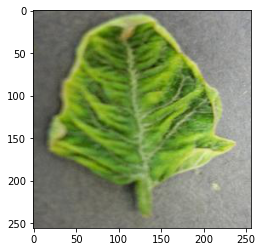

In [18]:
classes=list(train_generator.class_indices.keys())
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=224
img_height=224
model_finetuned.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model_finetuned.predict([prepare('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG')])

disease=image.load_img('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG')
plt.imshow(disease)
print(result)

In [19]:
import numpy as np
classresult=np.argmax(result,axis=1)
print(classes[classresult[0]])

Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [21]:
import tensorflow as tf
keras_model = tf.keras.models.load_model("plantdiseasemobilenet8epoch.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)

In [22]:
model = converter.convert()
file = open( 'outputmobilenetof8epoch.tflite' , 'wb' ) 
file.write( model )

17449080

In [24]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="outputmobilenetof8epoch.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print("")
print(output_details)

[{'name': 'mobilenet_1.00_224_input', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

[{'name': 'Identity', 'index': 116, 'shape': array([ 1, 38], dtype=int32), 'shape_signature': array([-1, 38], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [25]:
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
input_data = [prepare('/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus6.JPG')]

In [26]:
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], input_data[0])

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[1.3139571e-10 1.7316391e-15 3.4367468e-12 8.8985710e-14 1.5127339e-13
  2.6637972e-13 8.5031209e-17 1.7295161e-12 4.9299923e-14 3.1548115e-13
  3.9243450e-14 3.5994062e-16 6.0007782e-15 1.2928868e-12 1.5444003e-14
  1.0498152e-12 1.8162419e-11 1.3434943e-13 5.9023927e-12 6.7017171e-13
  1.3580759e-14 1.2843917e-13 3.6627808e-13 2.5207113e-12 2.9597126e-12
  4.1406911e-14 4.2564981e-14 1.3834947e-13 4.9121193e-11 5.1595078e-10
  4.9838716e-11 6.7494117e-13 1.4978730e-13 5.0753114e-11 9.4886238e-11
  1.0000000e+00 2.6786707e-12 2.9096531e-10]]


In [27]:
classresult=np.argmax(output_data,axis=1)
print(classes[classresult[0]])

Tomato___Tomato_Yellow_Leaf_Curl_Virus


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


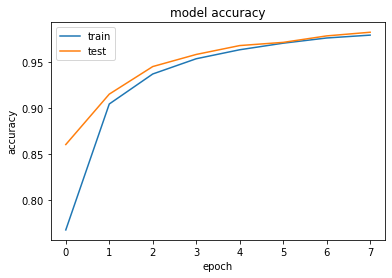

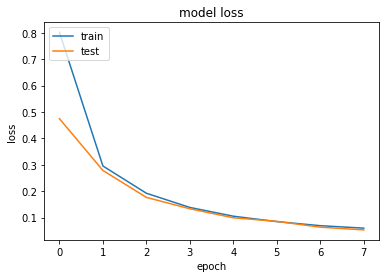

In [28]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

print(history_1.history.keys())

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()